In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("spotify-2023_utf8.csv")

In [3]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
data["in_shazam_charts"].fillna(0, inplace=True)
most_common_key=data["key"].mode()[0]
data["key"].fillna(most_common_key, inplace=True)
data["popularity_rank"]=data["streams"].rank(ascending=False).astype(int)
data.drop(574).reset_index(drop=True)
data[["track_name", "streams","popularity_rank" ]].head()

,track_name,streams,popularity_rank
0,Seven (feat. Latto) (Explicit Ver.),141381703,796
1,LALA,133716286,827
2,vampire,140003974,801
3,Cruel Summer,800840817,85
4,WHERE SHE GOES,303236322,452


In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula='Q("popularity_rank") ~ Q("released_month")', data=data).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Q("popularity_rank")   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                    0.4862
Date:                  Sun, 26 Nov 2023   Prob (F-statistic):              0.486
Time:                          21:21:48   Log-Likelihood:                -6705.2
No. Observations:                   953   AIC:                         1.341e+04
Df Residuals:                       951   BIC:                         1.342e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             487.5218     17.534     27.804      0.000     453.112     521.931
Q("released_month")    -1.7446      2.502     -0.697      0.486      -6.655       3.166
==============================================================================
Omnibus:                      680.926   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.952
Skew:                          -0.009   Prob(JB):                     4.30e-13
Kurtosis:                       1.803   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='released_month', ylabel='popularity_rank'>

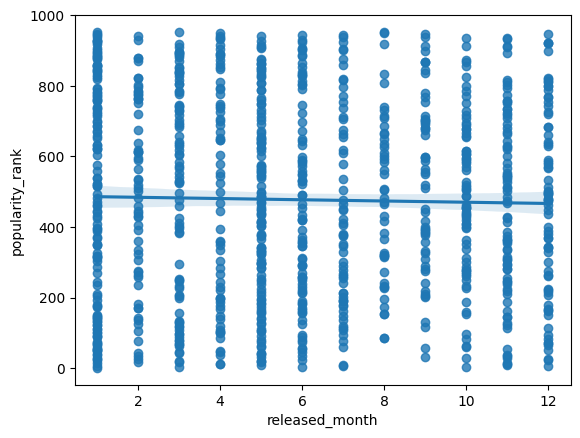

In [5]:
sns.regplot(data=data, y="popularity_rank", x="released_month", ci=95)

